In [1]:
import requests
import matplotlib.pyplot as plt
from IPython.display import clear_output
from datetime import datetime
import time

def get_iss_location():
    response = requests.get('http://api.open-notify.org/iss-now.json')
    data = response.json()
    timestamp = datetime.fromtimestamp(data['timestamp']).strftime('%Y-%m-%d %H:%M:%S')
    latitude = float(data['iss_position']['latitude'])
    longitude = float(data['iss_position']['longitude'])
    return latitude, longitude, timestamp

def iss_location():
    data_points = []
    for i in range(100):
        latitude, longitude, timestamp = get_iss_location()
        data_points.append((latitude, longitude, timestamp))
        time.sleep(10) 
        clear_output(wait=True)
        print(f"Collected {len(data_points)} data points")
    return data_points

data_points = iss_location()

Collected 100 data points


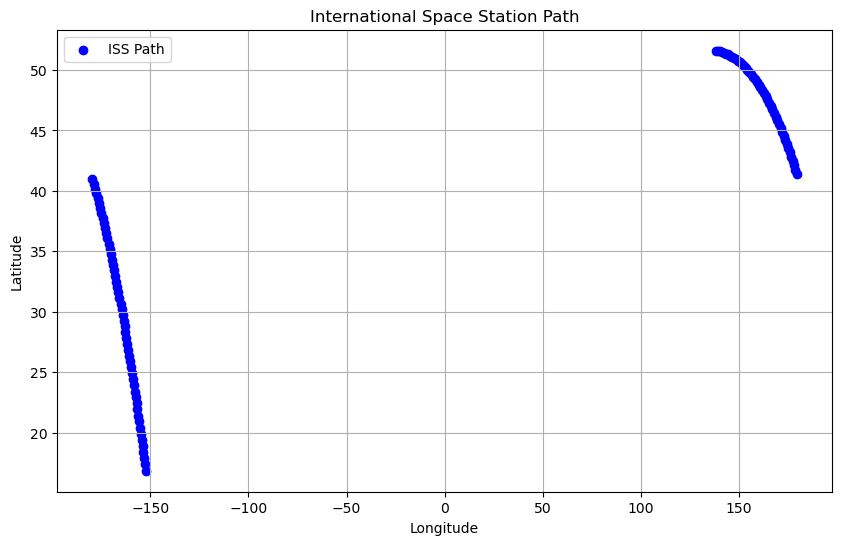

In [2]:
latitudes = [point[0] for point in data_points]
longitudes = [point[1] for point in data_points]

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c='blue', marker='o', label='ISS Path')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('International Space Station Path')
plt.legend()
plt.grid(True)
plt.show()

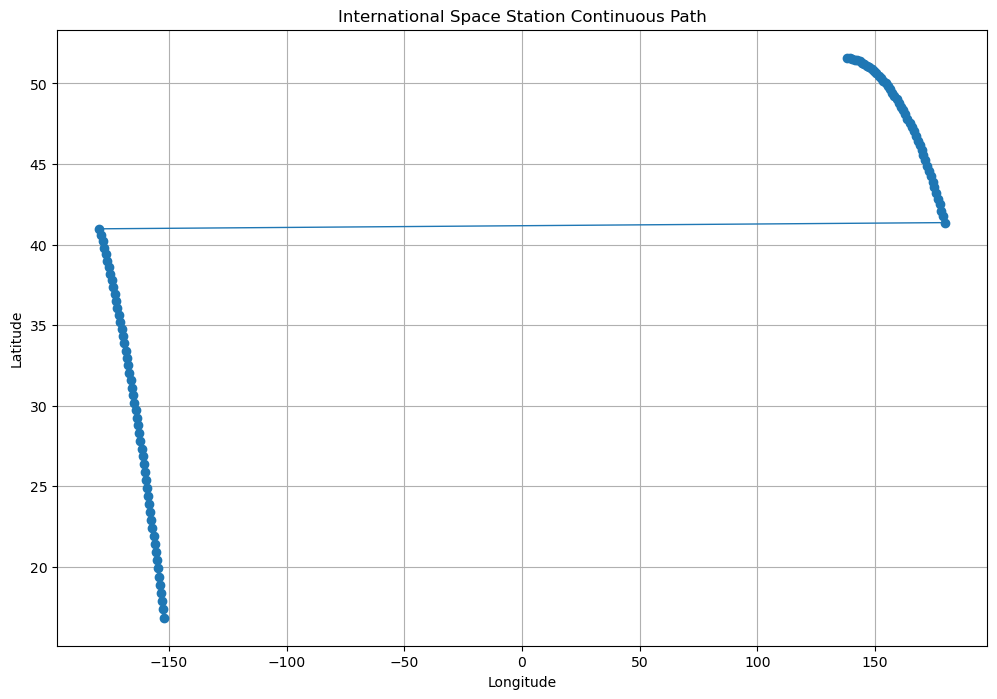

In [5]:
import matplotlib.pyplot as plt

latitudes = [point[0] for point in data_points]
longitudes = [point[1] for point in data_points]
timestamps = [point[2] for point in data_points]
plt.figure(figsize=(12, 8))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', markersize=6, linewidth=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('International Space Station Continuous Path')
plt.grid(True)
plt.show()


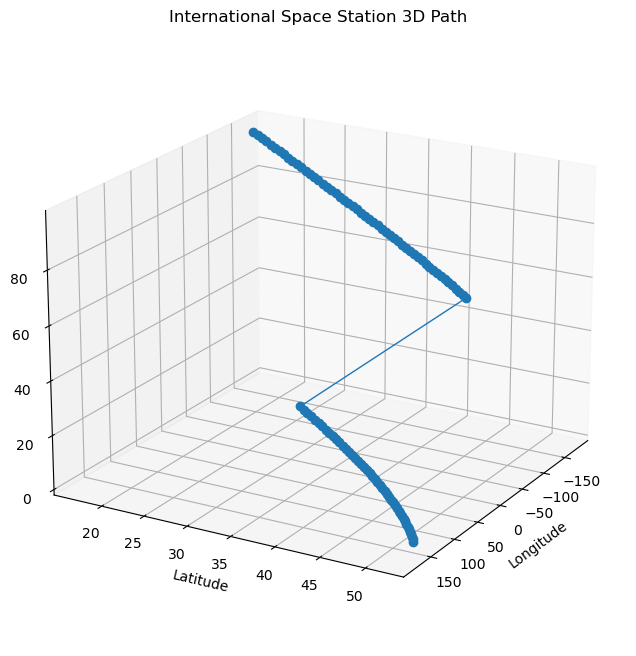

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

latitudes = [point[0] for point in data_points]
longitudes = [point[1] for point in data_points]
timestamps = [point[2] for point in data_points]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(longitudes, latitudes, range(len(data_points)), marker='o', linestyle='-', markersize=6, linewidth=1)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Timestamp')
ax.view_init(elev=20, azim=30)

plt.title('International Space Station 3D Path')
plt.show()